Question 1

ARIMA

In [2]:
print("Harish P")
print("21BBS0204")

!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import warnings
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

Harish P
21BBS0204


In [3]:
print("Harish P")
print("21BBS0204")

df = pd.read_csv('/content/crime.csv')
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head(2)

Harish P
21BBS0204


,Date,Crime_Count,Location
0,2023-01-01,41,EKM
1,2023-01-02,54,EKM


In [4]:
df['Parsed_Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
failed_parsing = df[df['Parsed_Date'].isnull()]

if not failed_parsing.empty:
    print("Rows with parsing errors:")
    print(failed_parsing['Date'])
else:
    print("All dates parsed successfully.")

# Set date as the index and sort the data
df = df.set_index('Parsed_Date')
df = df.sort_index(ascending=True)
print(f"Index Start: {df.index.min()}")
print(f"Index End: {df.index.max()}")

All dates parsed successfully.
Index Start: 2023-01-01 00:00:00
Index End: 2023-12-31 00:00:00


Harish P
21BBS0204
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=3102.426, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=3233.418, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=3177.114, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=3100.264, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=3231.462, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=3099.278, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=3100.182, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=3101.227, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=3096.086, Time=0.21 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=3098.047, Time=0.30 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=3098.051, Time=0.36 sec
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=3099.673, Time=0.77 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=3175.165, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[4] intercept   : AIC=3097.248, Time=0.29 sec
 ARIMA(1,1,2)(

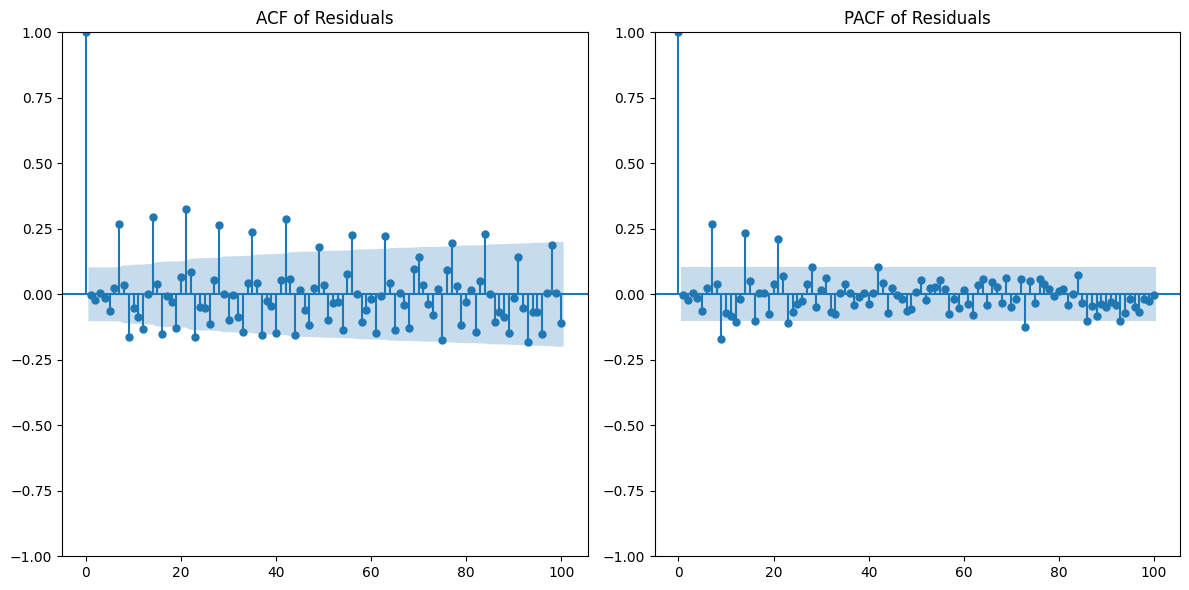

In [5]:
print("Harish P")
print("21BBS0204")

model = auto_arima(df['Crime_Count'], seasonal=True, m=4, trace=True, error_action='ignore', suppress_warnings=True)
residuals = model.resid()

lags = 100
acf_values = sm.tsa.stattools.acf(residuals, nlags=lags)
pacf_values = sm.tsa.stattools.pacf(residuals, nlags=lags)

print("Autocorrelation Function (ACF) Summary:")
for lag, value in enumerate(acf_values):
    print(f"Lag {lag}: ACF = {value:.4f}")

print("\nPartial Autocorrelation Function (PACF) Summary:")
for lag, value in enumerate(pacf_values):
    print(f"Lag {lag}: PACF = {value:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_acf(residuals, lags=lags, ax=ax1)
ax1.set_title('ACF of Residuals')

plot_pacf(residuals, lags=lags, ax=ax2)
ax2.set_title('PACF of Residuals')

plt.tight_layout()
plt.show()

In [6]:
print("Harish P")
print("21BBS0204")

df.index = pd.to_datetime(df.index)
df = df.asfreq('D')

model = SARIMAX(df['Crime_Count'],
                order=(2,1,3),
                seasonal_order=(0,0,0,4))
model_fit = model.fit()

forecast_steps = 75
forecast = model_fit.predict(start=0, end=len(df['Crime_Count']) + forecast_steps - 1, dynamic=False)

Harish P
21BBS0204


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Harish P
21BBS0204


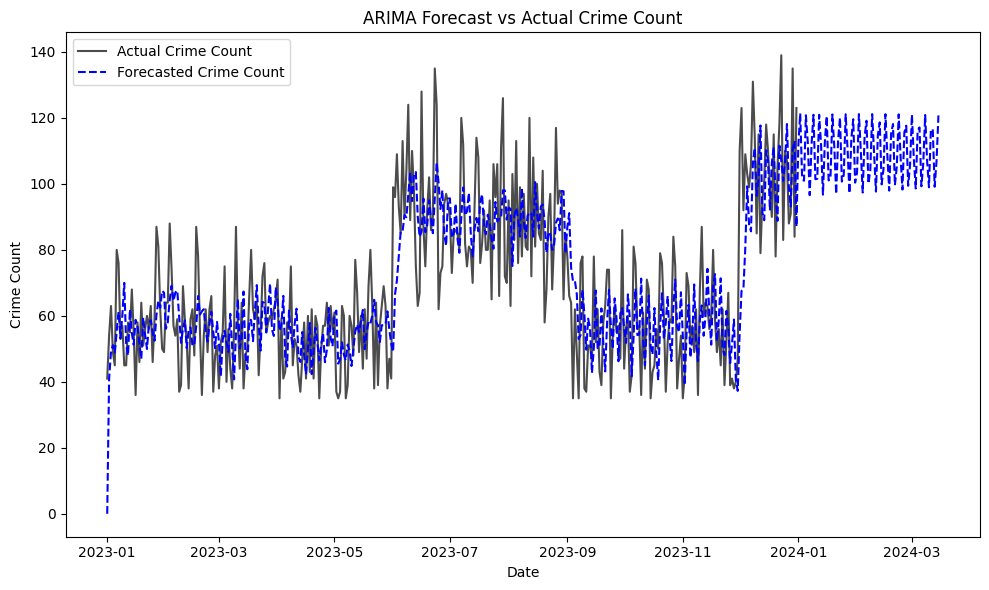

In [7]:
print("Harish P")
print("21BBS0204")
total_periods = len(df) + forecast_steps
forecast_index = pd.date_range(start=df.index[0], periods=total_periods, freq='D')
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Crime_Count'], label='Actual Crime Count', color='black', alpha=0.7)
plt.plot(forecast_index, forecast, label='Forecasted Crime Count', color='blue', linestyle='--')
plt.title('ARIMA Forecast vs Actual Crime Count')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.tight_layout()
plt.show()

AR

In [8]:
print("Harish P")
print("21BBS0204")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

Harish P
21BBS0204


In [9]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")

test_stationarity(df['Crime_Count'])
df['Crime_Count_Diff'] = df['Crime_Count'].diff().dropna()
test_stationarity(df['Crime_Count_Diff'].dropna())

ADF Statistic: -1.5533382934684987
p-value: 0.5069802523896082
The time series is non-stationary.
ADF Statistic: -6.290773065514321
p-value: 3.603923148717239e-08
The time series is stationary.


Harish P
21BBS0204


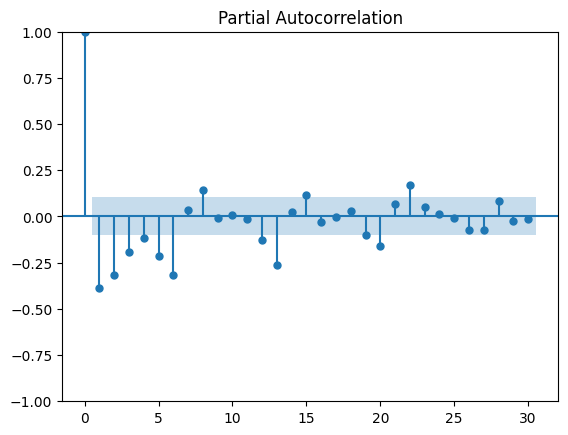

In [10]:
print("Harish P")
print("21BBS0204")

plot_pacf(df['Crime_Count_Diff'].dropna(), lags=30)
plt.show()

In [11]:
print("Harish P")
print("21BBS0204")

lag = 100
model = AutoReg(df['Crime_Count_Diff'].dropna(), lags=lag)
model_fitted = model.fit()

significant_lags = [i for i, p in enumerate(model_fitted.pvalues) if p <= 0.05]

filtered_model = AutoReg(df['Crime_Count_Diff'].dropna(), lags=significant_lags)
filtered_model_fitted = filtered_model.fit()

forecast_length = 75
predictions = filtered_model_fitted.predict(start=0, end=len(df['Crime_Count_Diff']) + forecast_length - 1, dynamic=False)

Harish P
21BBS0204


Harish P
21BBS0204


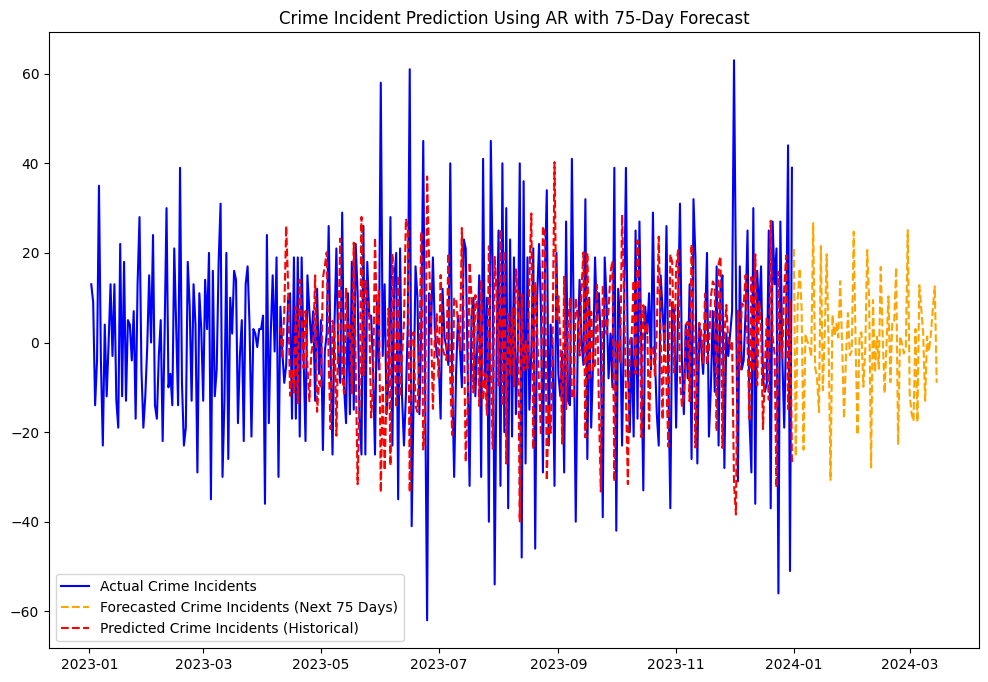

In [12]:
print("Harish P")
print("21BBS0204")

plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Crime_Count_Diff'], label='Actual Crime Incidents', color='blue')
plt.plot(
    pd.date_range(start=df.index[-1], periods=forecast_length + 1, freq='D')[1:],
    predictions[-forecast_length:],
    label='Forecasted Crime Incidents (Next 75 Days)',
    color='orange', linestyle='--'
)
plt.plot(
    df.index,
    predictions[:len(df['Crime_Count_Diff'])],
    label='Predicted Crime Incidents (Historical)',
    color='red', linestyle='--'
)
plt.title('Crime Incident Prediction Using AR with 75-Day Forecast')
plt.legend()
plt.show()

Question 2

In [13]:
print("Harish P")
print("21BBS0204")

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

Harish P
21BBS0204


In [14]:
df = pd.read_csv('/content/crime.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.head(2)

,Date,Crime_Count,Location
0,2023-01-01,41,EKM
1,2023-01-02,54,EKM


In [15]:
print("Harish P")
print("21BBS0204")

df['Simple_MA'] = df['Crime_Count'].rolling(window=7).mean()

model = ARIMA(df['Crime_Count'], order=(2, 0, 2))
arma_model = model.fit()
df['ARMA'] = arma_model.predict(start=0, end=len(df)-1)

df['Exponential_MA'] = df['Crime_Count'].ewm(span=7, adjust=False).mean()

def weighted_moving_average(values, weights):
    return np.dot(values, weights) / sum(weights)

weights = np.arange(1, 8)
df['WMA_10'] = df['Crime_Count'].rolling(window=7).apply(lambda x: weighted_moving_average(x, weights), raw=True)

def hull_moving_average(prices, window):
    half_length = int(window / 2)
    sqrt_length = int(np.sqrt(window))

    wma_half = prices.rolling(window=half_length).apply(lambda x: weighted_moving_average(x, np.arange(1, half_length + 1)), raw=True)
    wma_full = prices.rolling(window=window).apply(lambda x: weighted_moving_average(x, np.arange(1, window + 1)), raw=True)
    hull_series = 2 * wma_half - wma_full
    hma = hull_series.rolling(window=sqrt_length).apply(lambda x: weighted_moving_average(x, np.arange(1, sqrt_length + 1)), raw=True)
    return hma
df['HMA_20'] = hull_moving_average(df['Crime_Count'], window=20)

df.set_index('Date', inplace=True)

short_window = 10
long_window = 50
df['SMA_Short'] = df['Crime_Count'].rolling(window=short_window).mean()
df['SMA_Long'] = df['Crime_Count'].rolling(window=long_window).mean()

print("Debug 1: SMA Values Check")
print(df[['Crime_Count', 'SMA_Short', 'SMA_Long']].head(20))

df['Signal'] = 0

df.loc[df['SMA_Short'] > df['SMA_Long'], 'Signal'] = 1
df.loc[df['SMA_Short'] < df['SMA_Long'], 'Signal'] = -1

print("\nDebug 2: Signal Value Counts")
print(df['Signal'].value_counts())

print("\nDebug 3: Rows where signals should change")
print(df[(df['SMA_Short'] > df['SMA_Long']) | (df['SMA_Short'] < df['SMA_Long'])][['Crime_Count', 'SMA_Short', 'SMA_Long', 'Signal']].head(20))

df['Crossover'] = df['Signal'].diff()

print("\nDebug 4: Crossover Check (First 20 rows)")
print(df[['Signal', 'Crossover']].head(20))

buy_signals = df[df['Crossover'] == 1.0]
sell_signals = df[df['Crossover'] == -1.0]

print(df.tail(5))

Harish P
21BBS0204
Debug 1: SMA Values Check
            Crime_Count  SMA_Short  SMA_Long
Date                                        
2023-01-01           41        NaN       NaN
2023-01-02           54        NaN       NaN
2023-01-03           63        NaN       NaN
2023-01-04           49        NaN       NaN
2023-01-05           45        NaN       NaN
2023-01-06           80        NaN       NaN
2023-01-07           76        NaN       NaN
2023-01-08           53        NaN       NaN
2023-01-09           57        NaN       NaN
2023-01-10           45       56.3       NaN
2023-01-11           45       56.7       NaN
2023-01-12           58       57.1       NaN
2023-01-13           55       56.3       NaN
2023-01-14           68       58.2       NaN
2023-01-15           55       59.2       NaN
2023-01-16           36       54.8       NaN
2023-01-17           58       53.0       NaN
2023-01-18           46       52.3       NaN
2023-01-19           64       53.0       NaN
2023-01-20

Harish P
21BBS0204


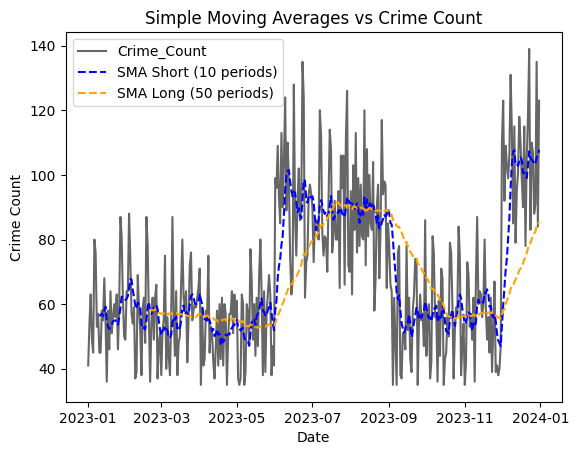

In [16]:
print("Harish P")
print("21BBS0204")

plt.plot(df['Crime_Count'], label='Crime_Count', alpha=0.6, color='black')
plt.plot(df['SMA_Short'], label=f'SMA Short ({short_window} periods)', linestyle='--', color='blue')
plt.plot(df['SMA_Long'], label=f'SMA Long ({long_window} periods)', linestyle='--', color='orange')
plt.title('Simple Moving Averages vs Crime Count')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend(loc='best')

Harish P
21BBS0204


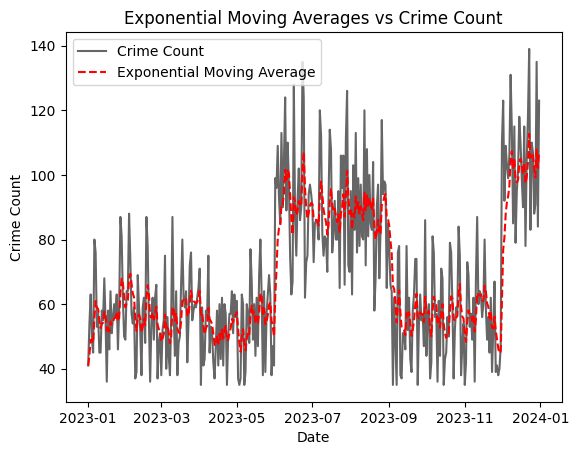

In [17]:
print("Harish P")
print("21BBS0204")
plt.plot(df['Crime_Count'], label='Crime Count', alpha=0.6, color='black')
plt.plot(df['Exponential_MA'], label=f'Exponential Moving Average', linestyle='--', color='red')
plt.title('Exponential Moving Averages vs Crime Count')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend(loc='best')

Harish P
21BBS0204


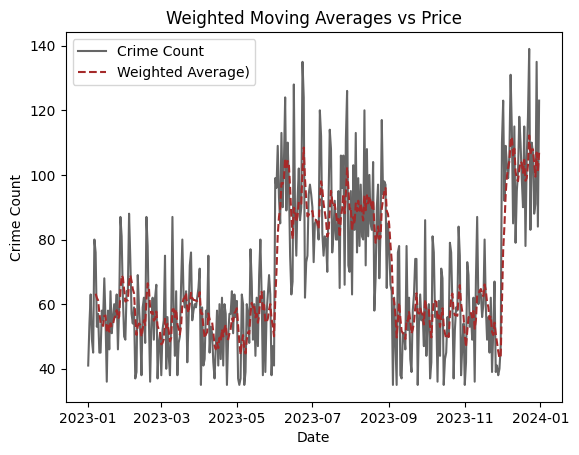

In [18]:
print("Harish P")
print("21BBS0204")
plt.plot(df['Crime_Count'], label='Crime Count', alpha=0.6, color='black')
plt.plot(df['WMA_10'], label=f'Weighted Average)', linestyle='--', color='brown')
plt.title('Weighted Moving Averages vs Price')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend(loc='best')

Harish P
21BBS0204


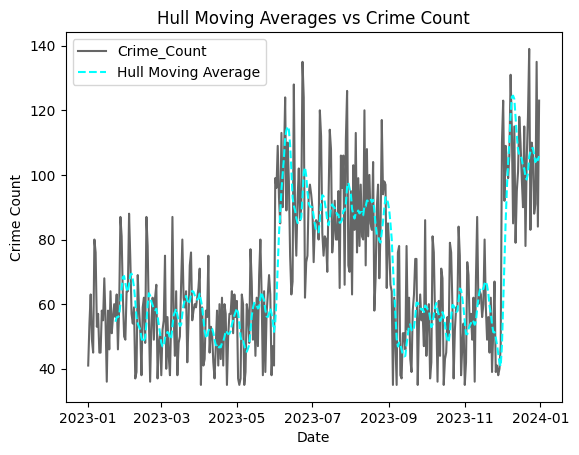

In [19]:
print("Harish P")
print("21BBS0204")
plt.plot(df['Crime_Count'], label='Crime_Count', alpha=0.6, color='black')
plt.plot(df['HMA_20'], label=f'Hull Moving Average', linestyle='--', color='cyan')
plt.title('Hull Moving Averages vs Crime Count')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend(loc='best')

Harish P
21BBS0204


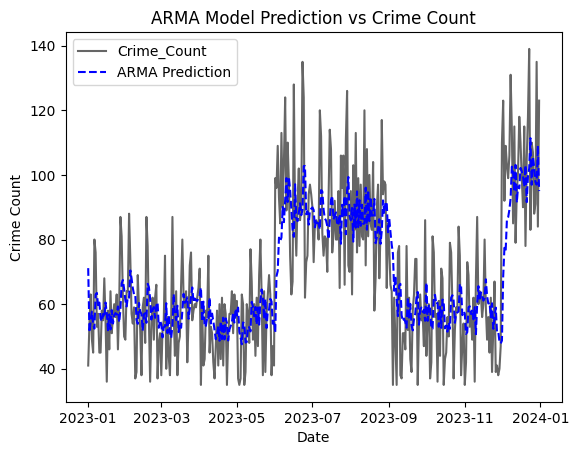

In [20]:
print("Harish P")
print("21BBS0204")
plt.plot(df['Crime_Count'], label='Crime_Count', color='black', alpha=0.6)
plt.plot(df['ARMA'], label='ARMA Prediction', linestyle='--', color='blue')
plt.title('ARMA Model Prediction vs Crime Count')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend(loc='best')

Harish P
21BBS0204


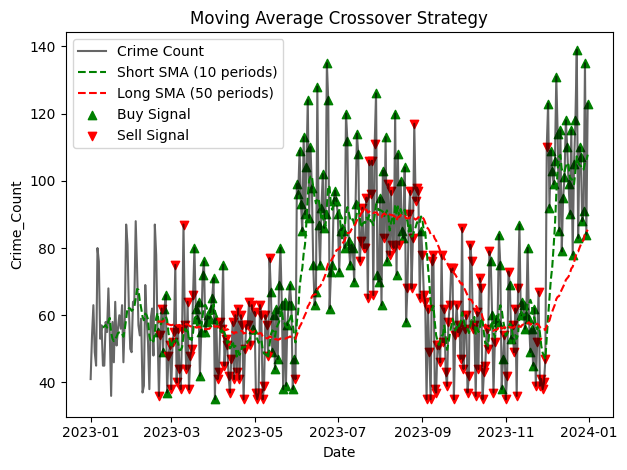

In [21]:
print("Harish P")
print("21BBS0204")
plt.plot(df['Crime_Count'], label='Crime Count', alpha=0.6, color='black')
plt.plot(df['SMA_Short'], label=f'Short SMA ({short_window} periods)', linestyle='--', color='green')
plt.plot(df['SMA_Long'], label=f'Long SMA ({long_window} periods)', linestyle='--', color='red')

buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Crime_Count'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Crime_Count'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Crime_Count')
plt.legend(loc='best')

plt.tight_layout()
plt.show()